In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [7]:
result_dir = 'output/resnet18/'
data = pd.read_csv(result_dir + 'predictions.csv')

In [8]:
preds = np.stack([data['class_0'],data['class_1']]).transpose()
targets = np.array(data['target'])
fpr, tpr, _ = roc_curve(targets, preds[:,1])
roc_auc = auc(fpr, tpr)

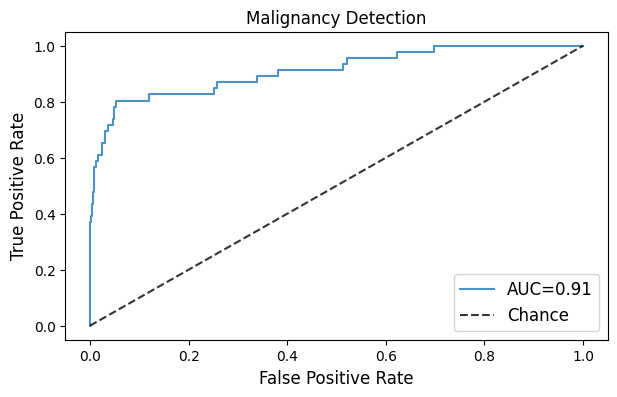

In [9]:
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(fpr, tpr, lw=1.5, alpha=.8, label='AUC=%0.2f' % roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.title('Malignancy Detection', fontsize=12)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
plt.show()